# Очистка данных


В этом блокноте рассмотрены частые задачи, связанные с подготовкой и очисткой данных.

## Ресурсы

 - Книга Маккинни У. Python и анализ данных, глава 7, глава 8.3, глава 11  
 - Книга Вандерпласа Дж. Python для сложных задач, глава 3
 - Книга Хейдта М. Главы 10, 11, 13, Приложения 4-6.
 - Онлайн-проверка регулярных выражений https://regex101.com/ и https://regexr.com/
 - Работа с регулярными выражениями и проверка https://easyregexp.ru/
 - Регулярные выражения для новичков https://tproger.ru/articles/regexp-for-beginners/
 - [Шпаргалка по регулярным выражениям в примерах](https://medium.com/nuances-of-programming/%D1%88%D0%BF%D0%B0%D1%80%D0%B3%D0%B0%D0%BB%D0%BA%D0%B0-%D0%BF%D0%BE-%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D1%8B%D0%BC-%D0%B2%D1%8B%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%D0%BC-%D0%B2-%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%B0%D1%85-53820a5f3435)
 - Как новичку разобраться в регулярных выражениях https://netpeak.net/ru/blog/kak-novichku-razobratsya-v-regulyarnyh-vyrazheniyah/
 
 
 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Обработка пропущенных значений

Пропущенные значения (NA = Not Available) вызывают массу проблем при анализе. Вычисления с пропущенными (неизвестными) значениями дают неизвестный результат. Пропущенные значения приходится либо отфильтровывать, теряя данные, либо заполнять на основе известных данных.

Пропущенные значения в таблицах pandas хранятся в виде специальных значений - `np.nan`. 

Нельзя искать пропущенные значения с помощью сравнения ==

In [2]:
np.nan == np.nan

False

Вместо этого необходимо использовать функцию или метод `isna()`:

In [3]:
pd.isna(np.nan)

True

Есть разные варианты того, что делать с пропущенными значениями - от "не делать ничего и выкинуть их" до "давайте предскажем их значения с помощью нейронки". Почитать можно здесь: 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Мы с вами попробуем сделать второй по сложности вариант (после не делать ничего) и заменить их типичным для данной переменной значением - средним или медианой. Для категориальных данных можно заполнять пропущенные значения наиболее частым значением - модой.

### Пропущенные значения в количественных столбцах

В экселе и текстовых файлах пропущенные значения в количественных столбцах отражаются как пустая ячейка или пропущенное значение в строке. Иногда для пропущенных значений используются специальные числовые коды, например -1, 999, 20000000 и т.п. Если у вас такие данные - необходимо указать, что это тоже пропущенные значения, используя аргумент `na_values=` функции для чтения файла (см. [справку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)). Если не сделать этого, то коды для пропущенных значений загрузятся как обычные числа и будут искажать результаты анализа

Для примера рассмотрим встроенный в библиотеку Seaborn набор данных про пассажиров Титаника:

In [4]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Видим, что в некоторых столбцах содержится меньше непустых значений, чем есть строк в наборе. Например, в столбце с возрастом есть довольно много пропусков:

In [6]:
titanic['age'].isna().sum()

177

Самый простой вариант - заменить эти значения на типичное значение возраста - среднее или медиану. Медиану лучше использовать когда распределение данных сильно скошенное.

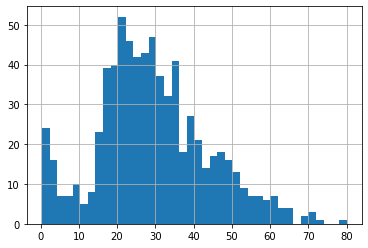

In [7]:
titanic['age'].hist(bins=40);

In [8]:
titanic['age'].mean()

29.69911764705882

In [9]:
titanic['age'].median()

28.0

В этом наборе данных распределение несимметрично и несколько очень пожилых людей сдвигают среднее значение возраста. Используем медиану. Для замены можем использовать метод `fillna()`:

In [10]:
titanic_clean = titanic.copy()
titanic_clean['age'].fillna(titanic_clean['age'].median(), inplace=True)
titanic_clean['age'].median()

28.0

Сейчас мы заменили возраст на "медиану по больнице". Однако часто имеет смысл разделить все объекты в наборе данных на категории и делать замену на типичное значение не "вообще", а для конкретной категории.

Пусть, например, неизвестны цены некоторых товаров, но мы знаем, что каждый из этих товаров по своим характеристикам отностится к одной из трех категорий - дешевый, средний и дорогой. Лучше заменить цену товара не на среднюю по всем товарам, а на среднюю цену товара каждой категории:

![](pics/group_averages.png)

В наборе данных про Титаник пассажиров тоже можно разделить на группы, например, по полу.

In [11]:
titanic.groupby('sex')['age'].median()

sex
female    27.0
male      29.0
Name: age, dtype: float64

Мы видим, что медианный возраст мужчин и женщин различается на 2 года. Поэтому мы можем заменить пропущенное значение возраста на медианное для соответствующего пола. Это можно сделать с помощью группировки и метода `transform()`, который "растягивает" посчитанные для групп показатели на весь исходный набор данных. 

In [12]:
titanic_clean['age2'] = titanic['age'].fillna(titanic.groupby('sex')['age'].transform('median'))
titanic_clean['age2'].median()

29.0

### Пропущенные значения в категориальных столбцах

Для категориальных столбцов пропущенные значения можно заменить на наиболее частое значение - моду. В наборе данных Титаник есть пропуски в столбце с портом отправления пассажира - `embark_town`:

In [13]:
titanic[titanic['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


Самое частое значение порта отправления - `Southampton`:

In [14]:
titanic['embark_town'].mode()

0    Southampton
dtype: object

Мы получили ряд (из одного элемента). Поскольку в ячейке таблицы должно храниться скалярное значение, а не ряд, необходимо извлечь единственный элемент ряда по индексу:

In [15]:
titanic['embark_town'].mode()[0]

'Southampton'

Используем это для замены пустых значений на моду:

In [16]:
titanic_clean['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
titanic_clean[titanic['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True,62.0


Еще один вариант - заменить пропущенные значения на специальную константу, например, "Неизвестно". В отличие от NaN, такие категории будут обрабатываться агрегирующими функциями и появляться на графиках. Сам факт наличия пропуска в некотором столбце может быть полезным предиктором.

Для 688 пассажиров титаника не указана палуба, на которой находилась их каюта:

In [17]:
titanic['deck'].isna().sum()

688

Наиболее частое значение палубы - `C` ([Shelter Deck](http://ssmaritime.com/Titanic-3.htm)):

In [18]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

Однако можно предположить, что самое большое количество пассажиров было размещено на нижних палубах, где условия были хуже, а плотность пассажиров гораздо выше. Поэтому было бы неправильным заменять пропущенное значение палубы на `C`. Можно отразить в данных, что палуба не указана в таблице:

In [19]:
titanic_clean['deck'].cat.add_categories('Unknown', inplace=True) # Сначала придется добавить уровень категориальной переменной
titanic_clean['deck'].fillna('Unknown', inplace=True)
titanic_clean['deck'].value_counts()

Unknown    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
Name: deck, dtype: int64

Рассчитаем долю выживших для разных палуб:

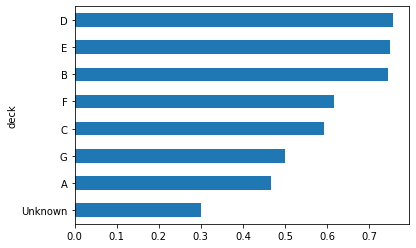

In [20]:
titanic_clean.groupby('deck')['survived'].mean().sort_values().plot.barh();

Среди пассажиров, для которых палуба была не указана, выживших меньше всего. Скорее всего, пропуски связаны именно с этим. 

Прием с заменой пропущенных значений на константу иногда полезен и для количественных столбцов. Однако мы не можем взять произвольное число, т.к. это исказит результаты. Но мы можем сначала преобразовать количественный столбец в категориальный, разбив диапазон значений на несколько групп. В этом случае можно будет добавить еще одну группу для пропущенных значений.

Разобъем всех пассажиров на 8 групп по возрасту:

In [21]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [22]:
titanic_clean['agecat'] = pd.cut(titanic['age'], 
                                 bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                                 include_lowest=True)
titanic_clean['agecat']

0      (20.0, 30.0]
1      (30.0, 40.0]
2      (20.0, 30.0]
3      (30.0, 40.0]
4      (30.0, 40.0]
           ...     
886    (20.0, 30.0]
887    (10.0, 20.0]
888             NaN
889    (20.0, 30.0]
890    (30.0, 40.0]
Name: agecat, Length: 891, dtype: category
Categories (8, interval[float64]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0]]

Заменим пустые значения на `Unknown`:

In [23]:
titanic_clean['agecat'].cat.add_categories('Unknown', inplace=True) # Сначала придется добавить уровень категориальной переменной
titanic_clean['agecat'].fillna('Unknown', inplace=True)
titanic_clean['agecat'].value_counts()

(20.0, 30.0]      230
Unknown           177
(30.0, 40.0]      155
(10.0, 20.0]      115
(40.0, 50.0]       86
(-0.001, 10.0]     64
(50.0, 60.0]       42
(60.0, 70.0]       17
(70.0, 80.0]        5
Name: agecat, dtype: int64

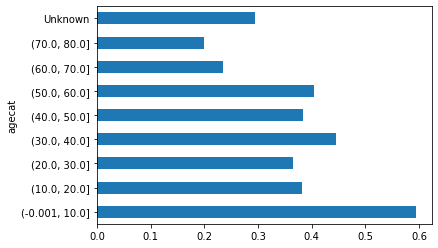

In [24]:
titanic_clean.groupby('agecat')['survived'].mean().plot.barh();

### Фильтрация пропущенных значений

Если пропусков немного, то данные можно просто отфильтровать. Для этого можно воспользоваться логической фильтрацией или специальным методом - `dropna()`:

In [25]:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


Потеряли 80% данных...

In [26]:
titanic.dropna(subset=['embark_town', 'age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Отфильтровали только пассажиров с неизвестным возрастом и портом отправления. Потери данных меньше, но остались пустые значения в столбцах.

Фильтровать можно не только строки, но и столбцы:

In [27]:
titanic.dropna(axis='columns')

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


Убрали все столбцы, где были пропуски (4 столбца).

**Замечание:** Нужно с осторожностью использовать автоматическую фильтрацию пропусков, поскольку эта операция может привести к большой потере данных и исказить результаты анализа. 

## 2. Аномальные значения

**Аномальные значения (выбросы)** – значения, не укладывающиеся в общую модель поведения процесса. Они сильно отличаются от остальных данных или не совместимы с ними

Аномальные значения можно разделить на два класса:

 - **искусственные** — связаны с ошибками ввода данных, некорректной работой программ или систем регистрации (например, сканера штрихкода);
 - **естественные** — отражают факты и события, имевшие место в действительности, но вызванные исключительными обстоятельствами, которые встречаются очень редко или в единичных случаях
 
Наличие аномальных значений существенно ухудшает достоверность выводов, полученных с использованием таких данных – необходимы поиск и корректировка аномалий.

Следует с осторожностью подходить к автоматической корректировке значений: сложно отличить искусственные и естественные аномалии, кроме очевидных случаев. Удаление естественных аномалий приведет к чрезмерно оптимистичным (с точки зрения их надежности) выводам.

### Методы поиска аномальных значений

Для поиска аномалий можно использовать визуальные или количественные методы. При визуализации данных аномалии выглядят как значительные и редкие отклонения значений. 

![](pics/series_outliers.png)

На рисунке представлен ряд данных о суммах выданных кредитов. Два значения, помеченные цифрами 1 и 2, могут рассматриваться как потенциальные аномалии. Действительно, в то
время как сумма кредита в основном не превышает 50 тыс., а средняя — около 20 тыс., суммы 70 тыс. выглядят подозрительно. Это как раз тот пограничный случай, когда значения несколько отклоняются от общей модели поведения данных, но в целом не противоречат ей. Вот если бы вместо 70 тыс. стояло 700 тыс., был бы повод задуматься.

Информация, полученная с помощью данного графика, может использоваться двояко. С точки зрения анализа имеет смысл либо исключить аномальные значения, либо привести их в соответствие с общей моделью данных, чтобы они не влияли на результаты анализа. С точки зрения руководства кредитного учреждения, эти два значения — повод к проверке. Лица, взявшие большой кредит, могут быть либо перспективными клиентами, к которым нужен особый подход (например, специальные условия кредитования), чтобы повысить их лояльность к банку, либо мошенниками. Следует отметить, что если бы система автоматически подавляла аномальные значения, то потенциально ценная информация была бы утрачена.

Для поиска аномалий в не упорядоченных хронологически данных используются такие инструменты анализа распределений, как гистограмма и ящичная диаграмма:

![](pics/boxplot.png)
![](pics/histogram.png)

Значения могут быть типичными сами по себе, но при этом сочетания значений могут быть аномальными. В этом случае можно применять многомерные методы анализа, например, диаграммы рассеяния. Мы ограничены при этом 2-3 измерениями.

Рассмотрим выборку, в которой указываются суммы кредитов и возраст клиентов. Очевидно, что наибольшее количество клиентов — это люди в самом трудоспособном возрасте, от 25 до 50 лет, которые берут кредиты на покупку теле- и видеоаппаратуры, холодильника, мебели и т. д. Сумма кредитов при этом составляет от 20 до 40 тыс. Люди помоложе, которые еще не
имеют стабильного заработка, подходят к кредитам осторожнее (если они не мошенники и мыслят здраво), и их доля в общем числе клиентов меньше. Что касается пожилых людей, то они также пользуются кредитами меньше, поскольку их финансовая стабильность под вопросом, да и запросы скромнее, чем у молодежи. Поэтому графическое представление соответствующей двумерной выборки будет выглядеть приблизительно так:

![](pics/2d_outliers.png)


На рисунке обозначены два типа аномалий. Буквой О помечены очевидные ошибки, когда сумма 80 тыс. была выдана 12-летнему ребенку и людям в возрасте около 100 лет. Эти значения нужно сразу исключать или корректировать. Буквой П помечены подозрительные значения, которые в целом не противоречат логике данных, но отклоняются от общей модели их поведения. Такие значения должны быть подвергнуты дополнительной проверке.


Количественные методы поиска аномалий основаны на оценке вероятности различных наблюдаемых значений. Аномальными считаются те значения, вероятность появления которых является достаточно низкой.

Например, популярный метод - это правило трех сигм. Его можно применять к данным, которые имеют симметричное распределение, похожее на нормальное:
![](pics/3sigma.png)

В нормальном распределении более чем на 3 стандартных отклонения от центра удалены лишь 0.3% наблюдений.

Альтернативным подходом является использование эмпирическое правило, предложенное Джоном Тьюки, которое основано на межквартильном размахе:
![](pics/boxplot.png)

Выбросами (т.е. аномальными значениями) считаются все значения, которые удалены более чем на 1.5 межквартильных размаха от верхней или нижней границы ящика.

При обнаружении аномальных значений в каждом конкретном случае необходимо решить, что с ними делать. Если эти значения мешают анализу (построению моделей и визуализаций), то есть несколько способов их обработки:

 - **Удаление записи** с аномальным значением  (когда доля таких записей незначительна)
 - **Ручная замена**  (если данных немного и аналитик может оценить, какое значение более приемлемо)
 - **Замена на наиболее вероятное или на среднее значение** (при большом объеме данных; выбросы заменяются на среднее или медиану распределения)
 - **Замена на ближайшее допустимое значение** (**винзоризация**,  winsorization - по имени изобретателя метода - Чарльза Винзора) - замена аномальных значений, выходящих за некоторый выбранный предел, на ближайшую границу этого предела.
 
![](pics/winsorization.png)
 
Для хронологически упорядоченных данных доступны еще два способа:
 - **Сглаживание данных** (при большом объеме данных можно применять автоматизированные методы фильтрации и сглаживания данных)
 - **Интерполяция данных** (аномальные значения заменяются другими, вычисленными на основе нескольких ближайших соседей)
 
![](pics/smoothing.png)

Рассмотрим работу с аномальными значениями на примере набора данных ОТП-банка:

In [28]:
otp = pd.read_excel('../datasets/otp_bank.xlsx')

In [29]:
otp.head()

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,education,marital_status,...,reg_phone_fl,gen_phone_fl,loan_num_total,loan_num_closed,loan_num_paym,loan_dlq_num,loan_max_dlq,loan_avg_dlq_amt,loan_max_dlq_amt,previous_card_num_utilized
0,59910150,0,49,работает,не пенсионер,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580.000000,1580.0,0.0
1,59910230,0,32,работает,не пенсионер,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,работает,не пенсионер,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,работает,не пенсионер,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,работает,не пенсионер,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


In [30]:
fields = pd.read_excel('../datasets/otp_bank.xlsx', sheet_name=1)
fields

,name,description
0,agreement_rk,уникальный идентификатор объекта в выборке
1,target,целевая переменная:отклик на маркетинговую кам...
2,age,возраст клиента
3,socstatus_work_fl,социальный статус клиента относительно работы ...
4,socstatus_pens_fl,социальный статус клиента относительно пенсии ...
5,gender,пол клиента
6,child_total,количество детей клиента
7,dependants,количество иждивенцев клиента
8,education,образование
9,marital_status,семейное положение


In [31]:
numeric_fields = ['age',
 'child_total',
 'dependants',
 'family_income',
 'personal_income',
 'credit',
 'fst_payment',
 'fact_living_term',
 'work_time',
 'loan_num_total',
 'loan_num_closed',
 'loan_num_paym',
 'loan_dlq_num',
 'loan_max_dlq',
 'loan_avg_dlq_amt',
 'loan_max_dlq_amt',
 'previous_card_num_utilized']

<ipython-input-32-956e253937e6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  otp[numeric_fields].hist(ax=ax, layout=(4, 4));


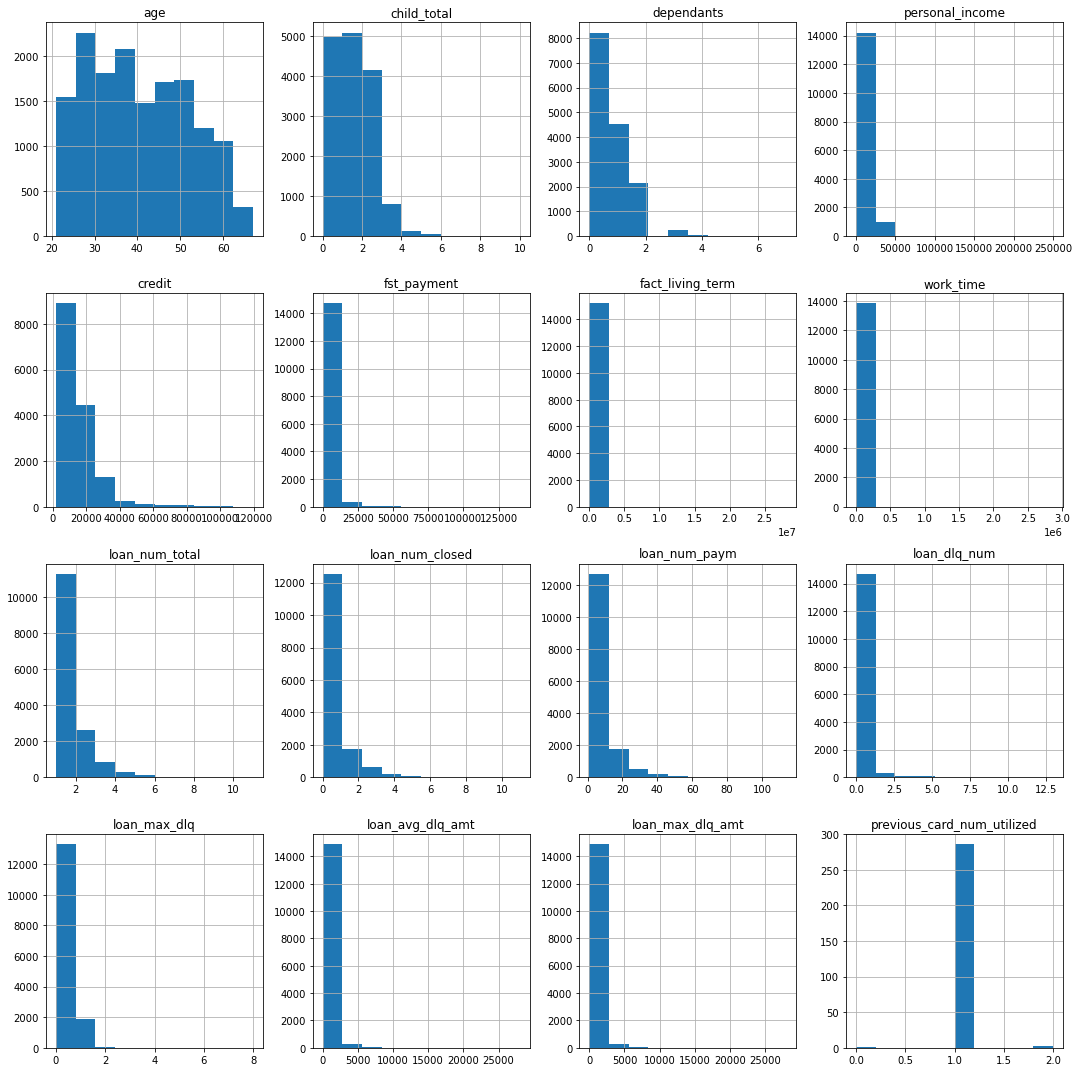

In [32]:
fig, ax=plt.subplots(figsize=(15, 15))
otp[numeric_fields].hist(ax=ax, layout=(4, 4));
plt.tight_layout()

Видны странные значения в столбцах со сроком проживания по текущему месту, сроком работы на текущем месте.

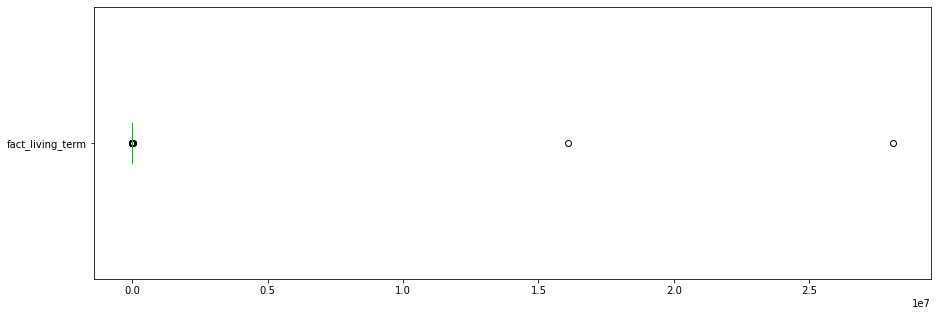

In [33]:
plt.figure(figsize=(15, 5))
otp['fact_living_term'].plot.box(vert=False);

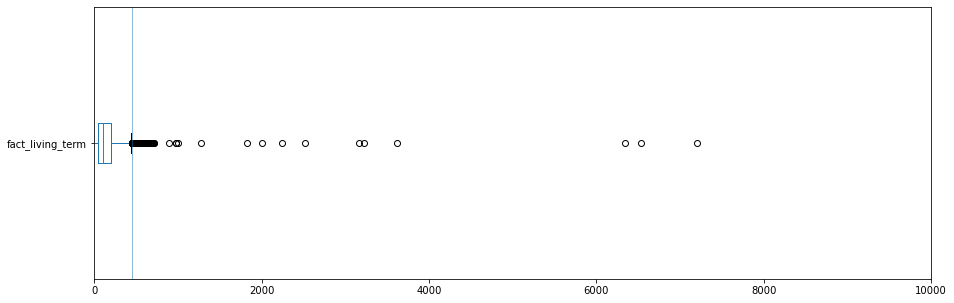

In [34]:
plt.figure(figsize=(15, 5))
otp['fact_living_term'].plot.box(vert=False)
plt.axvline(450, lw=0.5)
plt.xlim((0, 10000));

По правилу Тьюки выбросами можно считать все значения, выходящие за пределы ~450 месяцев проживания.

Более точно этот предел (1.5 межквартильных размаха от верхнего квартиля) можно найти так:

In [35]:
q1 = otp['fact_living_term'].quantile(0.25) #25% квантиль
q3 = otp['fact_living_term'].quantile(0.75) #75% квантиль
IQR = q3 - q1 #Межквартильный размах
limit = q3 + 1.5 * IQR
limit

448.5

In [36]:
otp.query('fact_living_term > @limit')[['agreement_rk', 'fact_living_term']]

,agreement_rk,fact_living_term
43,59915500,696
115,59925110,516
255,59938197,492
301,59963388,600
404,60036487,588
...,...,...
14707,74986795,1278
14739,74991796,7200
14842,75015155,588
14847,75015772,468


Ошибка содержится в небольшом числе записей (0.8% от общего их числа). В зависимости от дальнейших задач, можем:  
- отфильтровать эти записи (нежелательно, если столбец не будет использоваться в дальнейшем анализе);  
- заменить значения на пропущенные (строки не потеряются, но все некорректные значения будут исключены из дальнейшего анализа)
- заменить на типичные для данной категории клиентов значения (например, с учетом возраста клиента и региона проживания)

Замену можно выполнить с помощью функции `np.where()`:

In [37]:
otp_clean = otp.copy()
otp_clean['fact_living_term'] = np.where(otp_clean['fact_living_term'] > limit, 
                                         np.nan, otp_clean['fact_living_term'])

Помимо полученных по эмпирическому правилу Тьюки границ, мы можем ввести свои на основе логических рассуждений. Например, если самому старому клиенту в наборе данных 67 лет, то срок проживания по текущему месту жительства не может превышать 804 месяца.

In [38]:
67 * 12

804

Используя двухмерные методы анализа, можем выявить аномалии более точно:

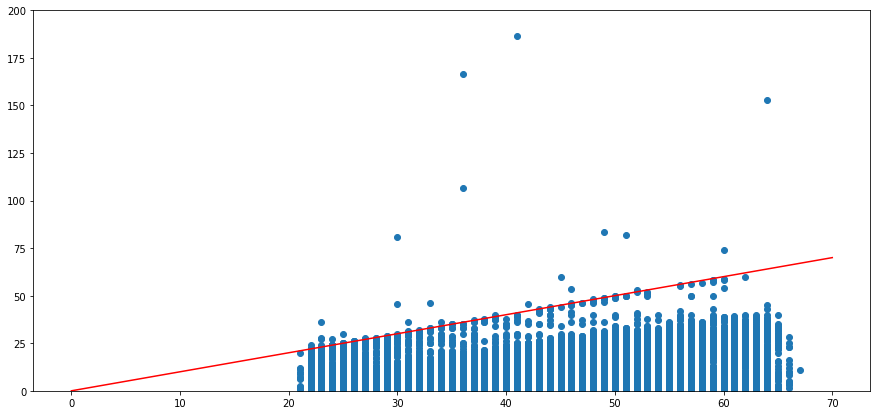

In [39]:
plt.figure(figsize=(15, 7))
plt.scatter(x=otp['age'], y=(otp['fact_living_term']/12))
plt.plot([0, 70], [0, 70], color='red')
plt.ylim((0, 200));

На этом графике все точки выше красной линии обозначают ошибку в данных, т.к. для клиента срок проживания (здесь он в годах) превышает его возраст. В данных такие значения можно найти с помощью фильтрации:

In [40]:
otp.query('fact_living_term > age * 12')[['agreement_rk', 'age', 'fact_living_term']]

,agreement_rk,age,fact_living_term
988,60383012,51,6534
1420,60527782,60,890
1640,61082560,23,336
2071,61154776,41,2240
2373,61249333,31,431
3711,61857829,23,288
5369,62438740,51,980
5681,62590265,31,3168
5772,62601928,42,546
5888,62615588,45,720


**Вопросы для обсуждения**

1. Какие методы можно использовать для выявления аномальных значений в столбце `work_time`?

2. В столбце `credit` на ящичной диаграмме видно много выбросов. Что с ними делать?

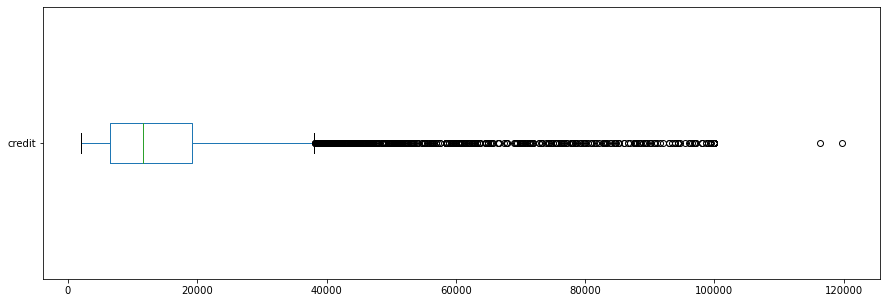

In [41]:
plt.figure(figsize=(15, 5))
otp['credit'].plot.box(vert=False);

Аномальные (редкие) значения могут содержаться и в категориальных данных. Такие значения могут мешать при построении моделей или при группировке данных по содержащим их столбцам:

In [42]:
province_counts = otp['reg_address_province'].value_counts()
province_counts

Кемеровская область            674
Краснодарский край             674
Алтайский край                 459
Читинская область              426
Приморский край                416
                              ... 
Магаданская область             22
Дагестан                         4
Агинский Бурятский АО            2
Усть-Ордынский Бурятский АО      2
Эвенкийский АО                   1
Name: reg_address_province, Length: 81, dtype: int64

Редкие значения можно объединять в одну группу. Например, мы можем объединить все редкие регионы проживания клиентов в одну группу - `Другой`. Порог для объединения подбирается эмпирически.

In [43]:
large_provinces = province_counts[province_counts > 100]
large_provinces

Кемеровская область      674
Краснодарский край       674
Алтайский край           459
Читинская область        426
Приморский край          416
                        ... 
Ленинградская область    130
Кабардино-Балкария       127
Калужская область        122
Санкт-Петербург          117
Нижегородская область    107
Name: reg_address_province, Length: 63, dtype: int64

In [44]:
otp_clean['reg_address_province'] = np.where(otp['reg_address_province'].isin(large_provinces.index), 
                                              otp['reg_address_province'], 'Другой')

otp_clean['reg_address_province'].value_counts()

Другой                   955
Кемеровская область      674
Краснодарский край       674
Алтайский край           459
Читинская область        426
                        ... 
Ленинградская область    130
Кабардино-Балкария       127
Калужская область        122
Санкт-Петербург          117
Нижегородская область    107
Name: reg_address_province, Length: 64, dtype: int64

### Обработка выбросов в хронологически упорядоченных данных

В данных временных рядов часто наблюдаются тренды и сезонные колебания, поэтому замена пустых и аномальных значений на средние работает неудовлетворительно. В таких случаях лучше использовать интерполяцию значений.

In [45]:
freight = pd.read_excel('../jupyter_tutorial/data/freight_turnover.xlsx') # Загрузка из файла Excel
freight.set_index('period', inplace=True)

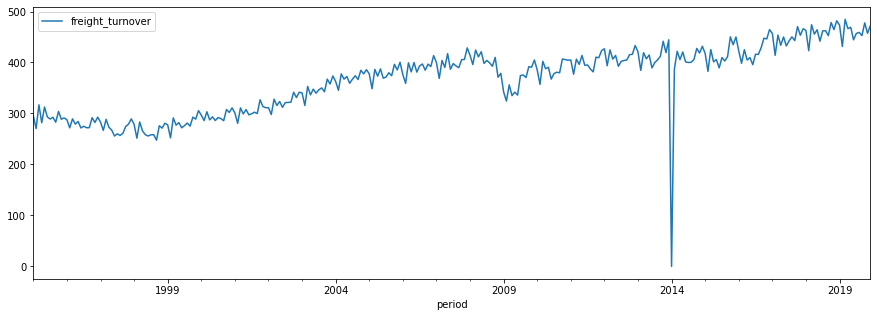

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
freight.plot(ax=ax);

In [47]:
freight['2014-01']

,freight_turnover
period,
2014-01-01,0.0


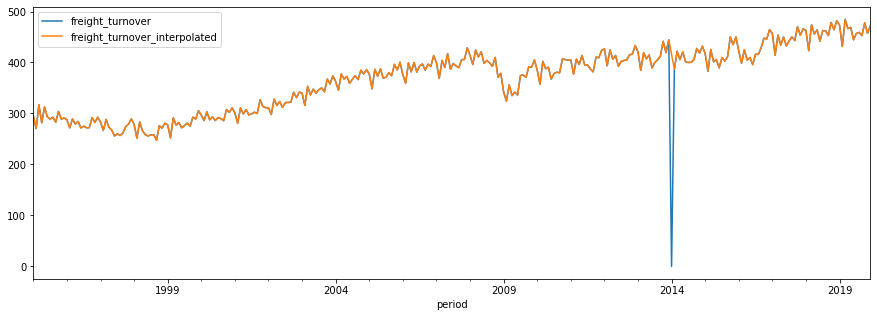

In [48]:
freight['freight_turnover_interpolated'] = freight['freight_turnover']
freight.loc['2014-01', 'freight_turnover_interpolated'] = np.nan
freight['freight_turnover_interpolated'] = freight['freight_turnover_interpolated'].interpolate()

fig, ax = plt.subplots(figsize=(15, 5))
freight.plot(ax=ax);

In [49]:
freight['2013-12':'2014-02']

,freight_turnover,freight_turnover_interpolated
period,,
2013-12-01,444.5,444.50
2014-01-01,0.0,415.75
2014-02-01,387.0,387.00


In [50]:
(444.45 + 387) / 2

415.725

Винзоризацию можно применять для стационарных (без тренда) временных рядов или неупорядоченных во времени данных. Для этого удобно использовать метод `clip()` (см. [справку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html))

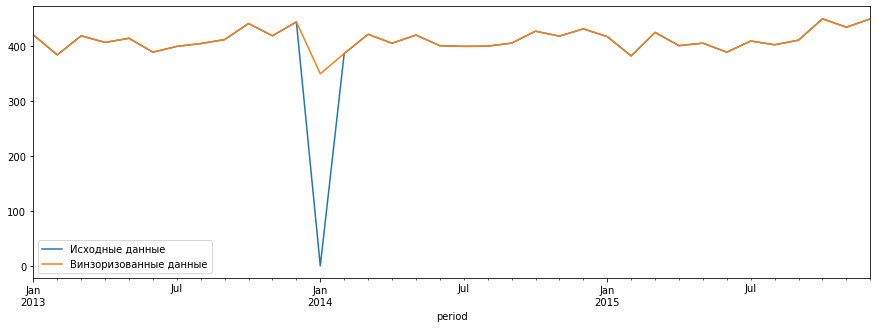

In [51]:
plt.figure(figsize=(15, 5))
freight['2013':'2015']['freight_turnover'].plot(label='Исходные данные')
freight['2013':'2015']['freight_turnover'].clip(350, 450).plot(label='Винзоризованные данные')
plt.legend();

Если же есть тренд, то результат будет плохим:

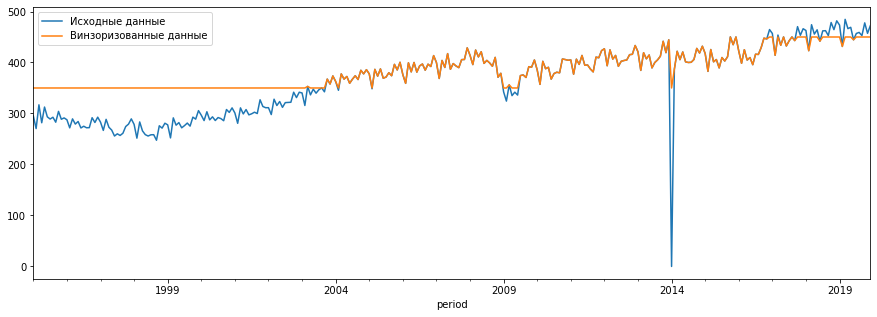

In [52]:
plt.figure(figsize=(15, 5))
freight['freight_turnover'].plot(label='Исходные данные')
freight['freight_turnover'].clip(350, 450).plot(label='Винзоризованные данные')
plt.legend();

## 3. Реструктуризация данных

### Хорошо упорядоченные данные (tidy data)

Данные могут быть представлены в различной форме. Следующие таблицы содержат одни и те же данные - динамику количества случаев заболевания (`cases`) и численности населения (`population`) в разных странах (`country`). Хотя  данные одни и те же, структура таблиц различается:

In [53]:
table1 = pd.read_csv('data/table1.csv')
table2 = pd.read_csv('data/table2.csv')
table3 = pd.read_csv('data/table3.csv')
table4a = pd.read_csv('data/table4a.csv')
table4b = pd.read_csv('data/table4b.csv')
table5 = pd.read_csv('data/table5.csv', dtype={'year' : 'str'})

In [54]:
table1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [55]:
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [56]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [57]:
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [58]:
table4b

,country,1999,2000
0,Afghanistan,19987071,20595360
1,Brazil,172006362,174504898
2,China,1272915272,1280428583


In [59]:
table5

,country,century,year,rate
0,Afghanistan,19,99,745/19987071
1,Afghanistan,20,00,2666/20595360
2,Brazil,19,99,37737/172006362
3,Brazil,20,00,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,00,213766/1280428583



**Вопрос:** В каком из представлений легче всего рассчитать в Pandas относительную частоту заболевания - число случаев на 10000 жителей?


Наиболее удобно представление данных, в котором:

  - все переменные расположены по столбцам,  
  - все наблюдения - по строкам, 
  - в каждой ячейке таблицы хранится одно значение. 

Данные в такой форме будем называть **хорошо упорядоченными** или **опрятными** (tidy). 

!["Хорошо упорядоченные" данные](pics/tidydata.png)

Преимуществом такой формы представления данных является единообразие: любая операция выполняется со столбцами таблицы, не требуется дополнительных действий, чтобы обратиться к нужным данным. Большинство функций агрегирования и визуализации данных в Python ориентированы на векторную обработку значений, то есть они работают именно со столбцами значений.

**Вопрос:** где находятся переменные в рассмотренных примерах таблиц?

### Плохо упорядоченные данные (messy data)

В противоположность "хорошо упорядоченным" данным, все остальные представления данных можно назвать **"плохо упорядоченными"** (messy). Этот термин означает лишь то, что обработка таких данных функциями для работы с таблицами будет более трудной. Это не значит, что сами данные - плохие или непригодные к анализу. Бывают ситуации, когда "плохая" для компьютерной обработки структура данных оказывается более удобной для человека - например, нам удобнее следить за динамикой показателей в сводных таблицах, где разные периоды времени отражаются отдельными столбцами.

Иногда данные приходится специально делать "плохо упорядоченными", объединяя несколько переменных в одном столбце, чтобы обеспечить их автоматизированную обработку.

Например, если требуется визуализировать динамику населения и количества случаев заболеваний, то для "плохо упорядоченного" набора данных это можно сделать одной командой, а для "хорошо упорядоченного" потребуется несколько.


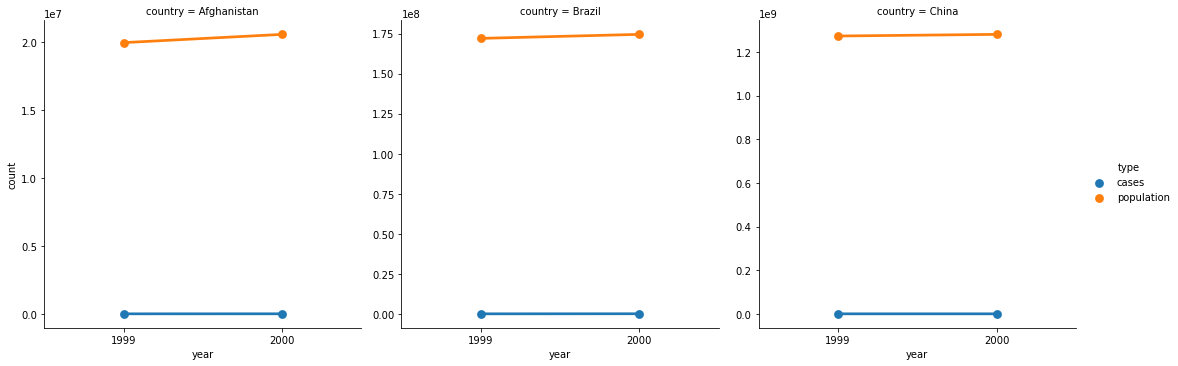

In [60]:
sns.catplot(x='year', y='count', hue='type', col = 'country', data=table2,
           kind='point', join=True, sharey=False);

### Как сделать данные хорошо упорядоченными?

В Pandas есть несколько функций для изменения структуры данных:

 - `melt()` - сворачивает широкую таблицу в длинную  
 - `pivot()` - разворачивает длинную таблицу в широкую
 - `pivot_table()` - то же, с агрегированием значений
 - `str.split()` - разделение текстового столбца на несколько столбцов
 - `explode()` - создание нескольких строк при разделении столбца на несколько значений
 - `str.cat()` - склеивание столбцов в один
 


### Свертка столбцов при помощи  `melt()`

Одной из проблем набора данных может быть то, что в названиях столбцов содержатся не названия переменных, а **значения** 
переменных. Чтобы привести данные к удобному формату, нужно собрать данные столбцов в две новые переменные, "расплавив" (melt) таблицу. 

![Работа `melt()`](pics/gather.png)

In [61]:
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [62]:
table4a.melt(id_vars='country', var_name='year', value_name='cases')

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


**Упражнение 3.1**

Произведите свертку столбцов следующего набора данных:

In [63]:
sales = pd.DataFrame({
  'Товар' : ("Молоко", "Сыр", "Масло", "Сметана"),
  'Москва': (350,430,360,570),
  'Санкт-Петербург' : (210,270,150,250),
  'Новосибирск' : (120,150,210,140)
})
sales

,Товар,Москва,Санкт-Петербург,Новосибирск
0,Молоко,350,210,120
1,Сыр,430,270,150
2,Масло,360,150,210
3,Сметана,570,250,140


### Развертка строк с помощью `pivot()`

Иногда наблюдения "разбросаны" по нескольким строкам. В этом случае метод `pivot()` позволяет собрать данные, относящиеся к одному наблюдению в одну строку.

![Работа функции `pivot()`](pics/spread.png)

In [64]:
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [65]:
table2.pivot(index=['country', 'year'], columns='type', values='count').reset_index()

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


**Упражнение 3.2** 

Разверните таблицу с показателями индекса развития логистики 
(источник: [World Bank](https://databank.worldbank.org/source/world-development-indicators#))

В строках должны быть показатели, а в столбцах - коды стран.

In [66]:
lpi = pd.read_csv('data/lpi.csv')
lpi.head(10)

,Country Name,Country Code,Series Name,Series Code,2018 [YR2018]
0,United States,USA,Logistics performance index: Overall (1=low to...,LP.LPI.OVRL.XQ,3.89
1,United States,USA,Logistics performance index: Ability to track ...,LP.LPI.TRAC.XQ,4.09
2,United States,USA,Logistics performance index: Ease of arranging...,LP.LPI.ITRN.XQ,3.51
3,United States,USA,Logistics performance index: Frequency with wh...,LP.LPI.TIME.XQ,4.08
4,United States,USA,Logistics performance index: Quality of trade ...,LP.LPI.INFR.XQ,4.05
5,United States,USA,Logistics performance index: Competence and qu...,LP.LPI.LOGS.XQ,3.87
6,United States,USA,Logistics performance index: Efficiency of cus...,LP.LPI.CUST.XQ,3.78
7,Spain,ESP,Logistics performance index: Overall (1=low to...,LP.LPI.OVRL.XQ,3.83
8,Spain,ESP,Logistics performance index: Ability to track ...,LP.LPI.TRAC.XQ,3.83
9,Spain,ESP,Logistics performance index: Ease of arranging...,LP.LPI.ITRN.XQ,3.83


### Разделение строк с помощью `str.split()`

Иногда значения нескольких переменных могут быть записаны в одном столбце через разделитель. В этом случае для обработки значений этих переменных необходимо разнести их по столбцам. Справиться с этой проблемой позволяет метод `str.split()`.

![Работа `str.split()`](pics/separate.png)

### Пример `str.split()`

В наборе данных `table3` в столбце `rate` записаны через разделитель "/" значения переменных `cases` и `population`. Разнесем их в соответствующие столбцы.

In [67]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [68]:
splitted = table3['rate'].str.split('/', expand=True).rename({0:'cases', 1:'population'}, axis='columns')
splitted

,cases,population
0,745,19987071
1,2666,20595360
2,37737,172006362
3,80488,174504898
4,212258,1272915272
5,213766,1280428583


Добавить столбцы в исходную таблицу можно так:

In [69]:
pd.concat([table3, splitted], axis='columns')

,country,year,rate,cases,population
0,Afghanistan,1999,745/19987071,745,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360
2,Brazil,1999,37737/172006362,37737,172006362
3,Brazil,2000,80488/174504898,80488,174504898
4,China,1999,212258/1272915272,212258,1272915272
5,China,2000,213766/1280428583,213766,1280428583


### Разделение на несколько строк с помощью `explode()`

Метод таблицы `explode()` позволяет разделить список значений в столбце на несколько отдельных строк. Для каждого элемента списка создается отдельная строка, а значения всех остальных столбцов дублируются.

In [70]:
df = pd.DataFrame({'Товар': [["А", "Б", "Ц"], "А", "Е", ["Ж", "Б"]], 'Код клиента': [1, 2, 3, 4]})
df

,Товар,Код клиента
0,"[А, Б, Ц]",1
1,А,2
2,Е,3
3,"[Ж, Б]",4


In [71]:
df.explode('Товар')

,Товар,Код клиента
0,А,1
0,Б,1
0,Ц,1
1,А,2
2,Е,3
3,Ж,4
3,Б,4


Если список значений хранится в столбце в виде строки, то предварительно надо разделить строку на элементы в виде списка с помощью `str.split()`:

In [72]:
df = pd.DataFrame({'Товар': ["А, Б, Ц", "А", "Е", "Ж, Б"], 'Код клиента': [1, 2, 3, 4]})
df

,Товар,Код клиента
0,"А, Б, Ц",1
1,А,2
2,Е,3
3,"Ж, Б",4


In [73]:
df['Список товаров'] = df['Товар'].str.split(',')
df

,Товар,Код клиента,Список товаров
0,"А, Б, Ц",1,"[А, Б, Ц]"
1,А,2,[А]
2,Е,3,[Е]
3,"Ж, Б",4,"[Ж, Б]"


In [74]:
df.explode('Список товаров')

,Товар,Код клиента,Список товаров
0,"А, Б, Ц",1,А
0,"А, Б, Ц",1,Б
0,"А, Б, Ц",1,Ц
1,А,2,А
2,Е,3,Е
3,"Ж, Б",4,Ж
3,"Ж, Б",4,Б


**Упражнение 3.3** 

Разделите адреса на отдельные компоненты (в столбцах) - индекс, город, улица, дом, строение:

In [75]:
addresses = pd.DataFrame({ 'address' : (
  "123022, г. Москва, Б. Трехсвятительский пер., д.3",
  "105187, г. Москва, ул. Кирпичная, д.33",
  "100100, г. Москва, ул. Мясницкая, д.13, стр. 4",
  "119049, г. Москва, ул. Шаболовка, д.26"
)}
)
addresses

,address
0,"123022, г. Москва, Б. Трехсвятительский пер., д.3"
1,"105187, г. Москва, ул. Кирпичная, д.33"
2,"100100, г. Москва, ул. Мясницкая, д.13, стр. 4"
3,"119049, г. Москва, ул. Шаболовка, д.26"


### Склеивание столбцов с помощью  `str.cat()`:

Метод `str.cat()` позволяет соединить значения нескольких столбцов в один.

![Работа функции str.cat()](pics/unite.png)

In [76]:
table5

,country,century,year,rate
0,Afghanistan,19,99,745/19987071
1,Afghanistan,20,00,2666/20595360
2,Brazil,19,99,37737/172006362
3,Brazil,20,00,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,00,213766/1280428583


In [77]:
table5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  6 non-null      object
 1   century  6 non-null      int64 
 2   year     6 non-null      object
 3   rate     6 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [78]:
#table5['century'].str.cat(table5['year']) # Не работает: century - не строка

In [79]:
table5['century'].astype('str').str.cat(table5['year'])

0    1999
1    2000
2    1999
3    2000
4    1999
5    2000
Name: century, dtype: object